In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from math import ceil

In [2]:
import warnings
warnings.filterwarnings('ignore')  # turn off warnings

In [3]:
# import iris data
iris = datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# sns.pairplot?

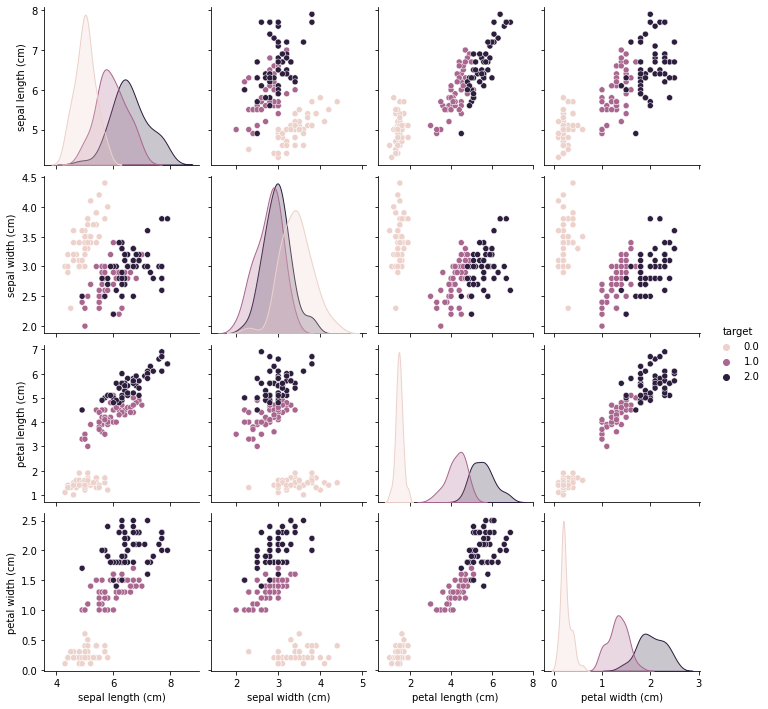

In [8]:
sns.pairplot(pd.DataFrame(np.c_[iris.data, iris.target], columns=np.r_[iris.feature_names, ['target']]), hue='target')

In [9]:
# obtain data & split to train/test subsets
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1,
                                                    stratify=y,
                                                    test_size=0.1)

In [10]:
# standard the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Task 
### 3. Using the Scikit-Learn Library, train the Logistic Regression model using the following
        1). All six cases of using two features at a time.
        2). All four cases of using three features at a time.
        3). The one case of using all features at once. 

In [11]:
X2c_1 = X_train[:, :2]      # use features (0-1 + 1) = 1,2
X2c_2 = X_train[:, [0,2]]   # use features (0,2 + 1) = 1,3
X2c_3 = X_train[:, [0,3]]   # use features (0,3 + 1) = 1,4
X2c_4 = X_train[:, 1:3]     # use features (1-2 + 1) = 2,3
X2c_5 = X_train[:, [1,3]]   # use features (1,3 + 1) = 2,4
X2c_6 = X_train[:, 2:]      # use features (2,3 + 1) = 2,4

X3c_1 = X_train[:, :3]      # 0-2 + 1 = 1,2,3
X3c_2 = X_train[:, 1:]      # 1-3 + 1 = 2,3,4
X3c_3 = X_train[:, [0,1,3]] # 0,1,3 + 1 = 1,2,4
X3c_4 = X_train[:, [0,2,3]] # 0,2,3 + 1 = 1,3,4

X_subsets = [X_train,X2c_1,X2c_2,X2c_3,X2c_4,X2c_5,X2c_6,X3c_1,X3c_2,X3c_3,X3c_4]


X2c_1t = X_test[:, :2]      # use features (0-1 + 1) = 1,2
X2c_2t = X_test[:, [0,2]]   # use features (0,2 + 1) = 1,3
X2c_3t = X_test[:, [0,3]]   # use features (0,3 + 1) = 1,4
X2c_4t = X_test[:, 1:3]     # use features (1-2 + 1) = 2,3
X2c_5t = X_test[:, [1,3]]   # use features (1,3 + 1) = 2,4
X2c_6t = X_test[:, 2:]      # use features (2,3 + 1) = 2,4

X3c_1t = X_test[:, :3]      # 0-2 + 1 = 1,2,3
X3c_2t = X_test[:, 1:]      # 1-3 + 1 = 2,3,4
X3c_3t = X_test[:, [0,1,3]] # 0,1,3 + 1 = 1,2,4
X3c_4t = X_test[:, [0,2,3]] # 0,2,3 + 1 = 1,3,4

Xt_subsets = [X_test,X2c_1t,X2c_2t,X2c_3t,X2c_4t,X2c_5t,X2c_6t,X3c_1t,X3c_2t,X3c_3t,X3c_4t]


In [12]:
# Create a Logistic Regression instance
lr = LogisticRegression()

# Fit the data
lr.fit(X_train_std, y_train)

LogisticRegression()

In [13]:
# Get predictions
y_pred = lr.predict(X_test_std)

# Calculate accuracy on training data
print('Miss-classified samples: %d' %((y_test != y_pred).sum()))
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

Miss-classified samples: 1
Accuracy: 0.93


In [14]:
# find number of literation to converge -- all-feature data
para={'max_iter':np.linspace(1, 100, 50)}
clf=GridSearchCV(LogisticRegression(), param_grid=para, cv=5, scoring='r2')
clf.fit(X_train_std, y_train)
# sorted(clf.cv_results_.keys()) 
rlt_df = pd.DataFrame(clf.cv_results_).iloc[:, [4, 11]]
rlt_df.head()

,param_max_iter,mean_test_score
0,1.0,0.733333
1,3.020408,0.855556
2,5.040816,0.922222
3,7.061224,0.933333
4,9.081633,0.933333


In [15]:
# find the minium number of literation to converge
ceil(rlt_df.loc[rlt_df['mean_test_score']==rlt_df['mean_test_score'].max(), 'param_max_iter'].min())

8

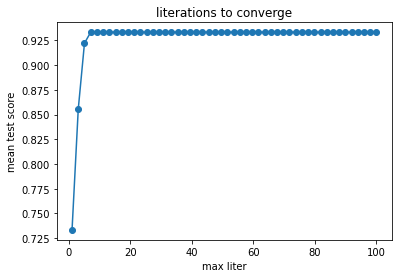

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rlt_df.iloc[:,0], rlt_df.iloc[:,1])
ax.scatter(rlt_df.iloc[:,0], rlt_df.iloc[:,1], marker="o")
ax.set(title='literations to converge',
      ylabel='mean test score',
      xlabel='max liter')
plt.show()

### 4. Summarize your results (i.e, what's the best accuracy you can obtain for each of the 11 cases you considered, how many iterations does it take to converge, anything else you think is relevant and important) in a table.

In [17]:
miss_classified_s = []
accuracy = []
n_liter = []
for X_subset, Xt_subset in zip(X_subsets, Xt_subsets):
    lr.fit(X_subset, y_train)      # Fit the data
    y_pred = lr.predict(Xt_subset) # get prediction
    miss_classified_s.append((y_test != y_pred).sum())
    accuracy.append(accuracy_score(y_test,y_pred))
    
    clf.fit(X_subset, y_train) # find n of literation
    rlt_df = pd.DataFrame(clf.cv_results_).iloc[:, [4, 11]]
    min_n = ceil(rlt_df.loc[rlt_df['mean_test_score']==rlt_df['mean_test_score'].max(), 'param_max_iter'].min())
    n_liter.append(min_n)
    
    lr_result = np.c_[miss_classified_s, accuracy, n_liter]
    
lr_result

array([[ 1.        ,  0.93333333, 12.        ],
       [ 4.        ,  0.73333333, 30.        ],
       [ 1.        ,  0.93333333, 12.        ],
       [ 2.        ,  0.86666667, 32.        ],
       [ 2.        ,  0.86666667, 24.        ],
       [ 0.        ,  1.        ,  4.        ],
       [ 1.        ,  0.93333333, 16.        ],
       [ 1.        ,  0.93333333, 10.        ],
       [ 1.        ,  0.93333333, 28.        ],
       [ 1.        ,  0.93333333, 20.        ],
       [ 1.        ,  0.93333333, 36.        ]])

#### Table 1. feature combinations and the corresponding predict accuracy

In [18]:
# organize the results by adding index and columns name
lr_result_p = pd.DataFrame(lr_result, index=['all_features', '2_feature_1', '2_feature_2', '2_feature_3', '2_feature_4','2_feature_5','2_feature_6','3_feature_1', '3_feature_2','3_feature_3','3_feature_4'],
            columns=['Miss classified samples', 'Accuracy', 'Number of literations'])
lr_result_p

,Miss classified samples,Accuracy,Number of literations
all_features,1.0,0.933333,12.0
2_feature_1,4.0,0.733333,30.0
2_feature_2,1.0,0.933333,12.0
2_feature_3,2.0,0.866667,32.0
2_feature_4,2.0,0.866667,24.0
2_feature_5,0.0,1.000000,4.0
2_feature_6,1.0,0.933333,16.0
3_feature_1,1.0,0.933333,10.0
3_feature_2,1.0,0.933333,28.0
3_feature_3,1.0,0.933333,20.0


### 5. Play with both L1 and L2 regularization and vary the regularization parameter C.

Weight Visualization for all features

In [19]:
# For plotting in the Jupyter Notebook environment as an inline output
%matplotlib inline

<StemContainer object of 3 artists>

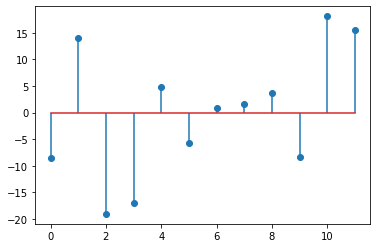

In [20]:
# By default, LogisticRegression() is set on penalty as L2 and C=1.
# To simulate no regularization, we will select a large C to minimize regularization to show the effect of regularization

logreg_w=LogisticRegression(C=1e10)
logreg_w.fit(X_train_std, y_train)
W=logreg_w.coef_
W=W.flatten()
plt.stem(W)

find the top three labels that are most heavily weighted

In [21]:
idx1=np.argsort(np.abs(W))[-1]
idx2=np.argsort(np.abs(W))[-2]
idx3=np.argsort(np.abs(W))[-3]

iris_label = [x+'-'+y for x in iris['target_names'] for y in iris['feature_names']]
heavy=[iris_label[idx1], iris_label[idx2],iris_label[idx3]]
heavy

['setosa-petal length (cm)',
 'virginica-petal length (cm)',
 'setosa-petal width (cm)']

In [22]:
# LogisticRegression?

#### Table 2. Influence of parameter C and changes of the penalty model

In [23]:
# change the number of C and penalty model-- all-feature train_std-data
para2={'C': [1, 10, 100, 1000, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10], 'penalty': ['l1', 'l2']}
clf2=GridSearchCV(LogisticRegression(), param_grid=para2, cv=5, scoring='r2')
clf2.fit(X_train_std, y_train)

rlt_df2 = pd.DataFrame(clf2.cv_results_).iloc[:,4:]
rlt_df2

,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
1,1,l2,"{'C': 1, 'penalty': 'l2'}",0.944444,0.944444,0.944444,0.888889,0.944444,0.933333,0.022222,10
2,10,l1,"{'C': 10, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
3,10,l2,"{'C': 10, 'penalty': 'l2'}",0.888889,0.944444,0.944444,0.944444,1.000000,0.944444,0.035136,1
4,100,l1,"{'C': 100, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
5,100,l2,"{'C': 100, 'penalty': 'l2'}",0.888889,0.944444,0.888889,0.944444,1.000000,0.933333,0.041574,2
6,1000,l1,"{'C': 1000, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
7,1000,l2,"{'C': 1000, 'penalty': 'l2'}",0.888889,0.944444,0.888889,0.944444,1.000000,0.933333,0.041574,2
8,10000.0,l1,"{'C': 10000.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
9,10000.0,l2,"{'C': 10000.0, 'penalty': 'l2'}",0.888889,0.944444,0.888889,0.944444,1.000000,0.933333,0.041574,2


<StemContainer object of 3 artists>

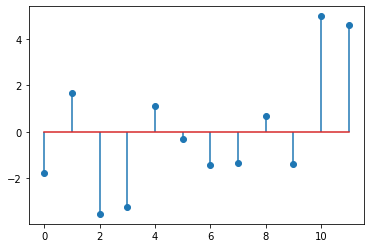

In [24]:
# we find accuracy ranks top for l2 when C = 10 and 1
# visualize weight when C = 10
logreg_w=LogisticRegression(C=10)
logreg_w.fit(X_train_std, y_train)
W=logreg_w.coef_
W=W.flatten()
plt.stem(W)

In [25]:
idx1=np.argsort(np.abs(W))[-1]
idx2=np.argsort(np.abs(W))[-2]
idx3=np.argsort(np.abs(W))[-3]

iris_label = [x+'-'+y for x in iris['target_names'] for y in iris['feature_names']]
heavy=[iris_label[idx1], iris_label[idx2],iris_label[idx3]]
heavy

['virginica-petal length (cm)',
 'virginica-petal width (cm)',
 'setosa-petal length (cm)']

<StemContainer object of 3 artists>

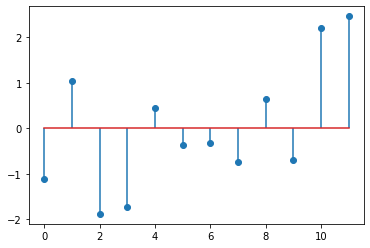

In [26]:
# # visualize weight when C = 1 (default value)
logreg_w=LogisticRegression()
logreg_w.fit(X_train_std, y_train)
W=logreg_w.coef_
W=W.flatten()
plt.stem(W)

In [27]:
idx1=np.argsort(np.abs(W))[-1]
idx2=np.argsort(np.abs(W))[-2]
idx3=np.argsort(np.abs(W))[-3]

iris_label = [x+'-'+y for x in iris['target_names'] for y in iris['feature_names']]
heavy=[iris_label[idx1], iris_label[idx2],iris_label[idx3]]
heavy

['virginica-petal width (cm)',
 'virginica-petal length (cm)',
 'setosa-petal length (cm)']

# Discussions

1. Does using more dimensions help when trying to classify the data in this dataset? 

Answer: we can see from table 1, that more dimensions does not neccesarily helpful for the accuarcy of the classification. Two features combination of septal width & petal width has the best performance in my model. 

2. How important is regularization in these cases?

Regularization refers to the act of modifying a learning algorithm to favor “simpler” prediction rules to avoid overfitting. It also helps with generalization because it won’t give large weight to features unless there is sufficient evidence that they are useful. When the regularizer is the squared L2 norm ||w||^2, this is called L2 regularization.Logistic regressionplementations usually use L2 regularization by default. L1 is used in linear regretion model. 

C refers to the inverse regularization strength, the biger the C number is, the less regulatory modifications on the weights are. we can see from our weight figures, when the C value set to bigger, the weight values are relatively higher, and the table2 results show that the corresponding model and thus the predict accuracy are more unstable (higher std_test_score).  